## Final Project Lign 168
Spring 2024

Keri Chen

## First, we install the necessary imports and libraries

In [2]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install tensorflow
#!pip install os wave glob
#!pip install scipy 
#!pip install librosa
#!pip install keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
import os
import wave
import glob

In [5]:
from scipy.io import wavfile
from scipy import fft
from scipy import signal
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy.fft import fftshift
from scipy.spatial.distance import cdist
import librosa

In [6]:
#importing neural models to help with detection 

from tensorflow import keras
from keras import layers, Sequential, Input
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPool2D, GlobalAvgPool1D, Dropout, BatchNormalization, Dense, LSTM, Flatten
# from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.regularizers import l2
from keras import backend as K

## Get the bird sound files

In [6]:
#code snippet generated through ChatGPT

# Specify the folder containing the .wav files
folder_path = '/Users/kerichen/Downloads/Animals/bird'
# Use glob to find all .wav files in the folder
bird_files = glob.glob(os.path.join(folder_path, '*.wav'))

In [7]:
librosa.load('/Users/kerichen/Downloads/Animals/bird/0a7c2a8d_nohash_0.wav')

(array([-0.00014037,  0.00117776, -0.00058977, ...,  0.00038463,
         0.00082914,  0.00069896], dtype=float32),
 22050)

## Get cat files

In [8]:
# Specify the folder containing the .wav files
folder_path = '/Users/kerichen/Downloads/Animals/cat'

# Get cat files
cat_files = glob.glob(os.path.join(folder_path, '*.wav'))

## Get dog files

In [9]:
# Specify the folder containing the .wav files
folder_path = '/Users/kerichen/Downloads/Animals/dog'

# Get dog files
dog_files = glob.glob(os.path.join(folder_path, '*.wav'))

## Get custom files ('I love badminton')

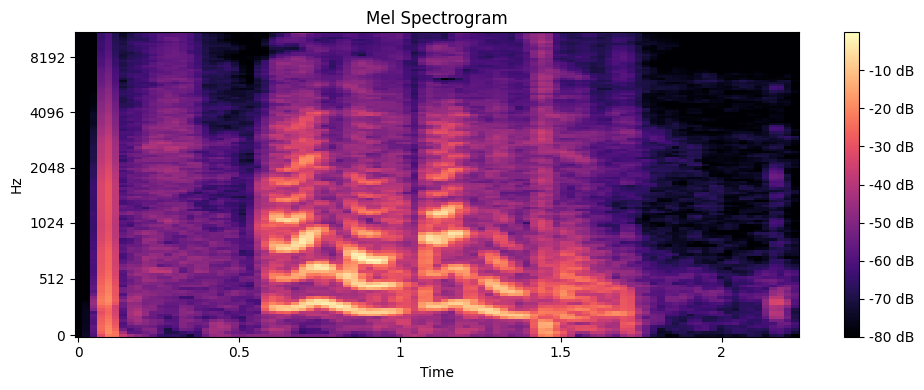

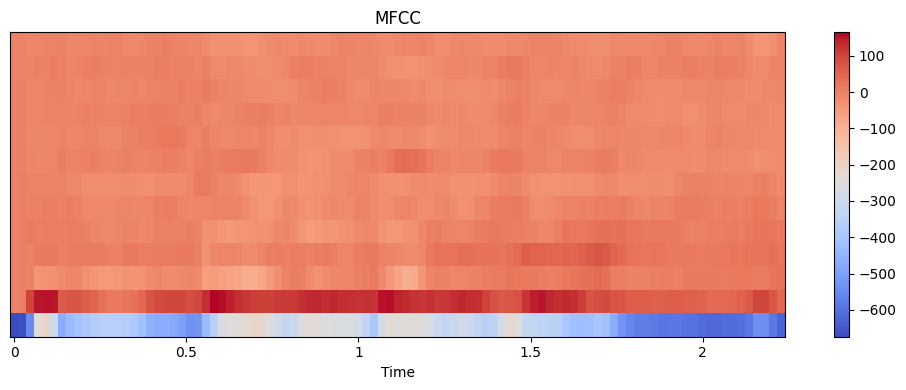

In [10]:
# File path to your .m4a file
file_path = 'Desktop/Wav Files/Final Project 1.wav'

# Load the audio file
y, sr = librosa.load(file_path)

# Extract features
# Compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [11]:
#Define a function to help us get the features for each of the dataset iteratively for each of the files

def get_features(files):
    X = []
    spectrograms = []
    mel_spectrograms = []
    mfccs = []

    for file in files:
        wav, sr = librosa.load(file, sr=None)

        spectrogram = np.abs(librosa.stft(wav))

        mel_spectrogram = librosa.feature.melspectrogram(y=wav, sr=sr)

        mfcc = librosa.feature.mfcc(y=wav, sr=sr)

        X.append(wav)
        spectrograms.append(spectrogram)
        mel_spectrograms.append(mel_spectrogram)
        mfccs.append(mfcc)

    #padding and shape code generated through CHAT-GPT
    # Pad sequences to ensure consistent shape for batch processing
    max_length = max(map(len, X))
    X = np.array([np.pad(x, (0, max_length - len(x)), 'constant') for x in X])

    # Ensure spectrogram, mel spectrogram, and MFCC have the same shape
    spectrograms = np.array([np.pad(s, ((0, 0), (0, max_length - s.shape[1])), 'constant') for s in spectrograms])
    mel_spectrograms = np.array([np.pad(m, ((0, 0), (0, max_length - m.shape[1])), 'constant') for m in mel_spectrograms])
    mfccs = np.array([np.pad(m, ((0, 0), (0, max_length - m.shape[1])), 'constant') for m in mfccs])
    
    return X, spectrograms, mel_spectrograms, mfccs

In [13]:
x_data_bird, spectrograms_bird, mel_spectrograms_bird, mfccs_bird = get_features(bird_files)

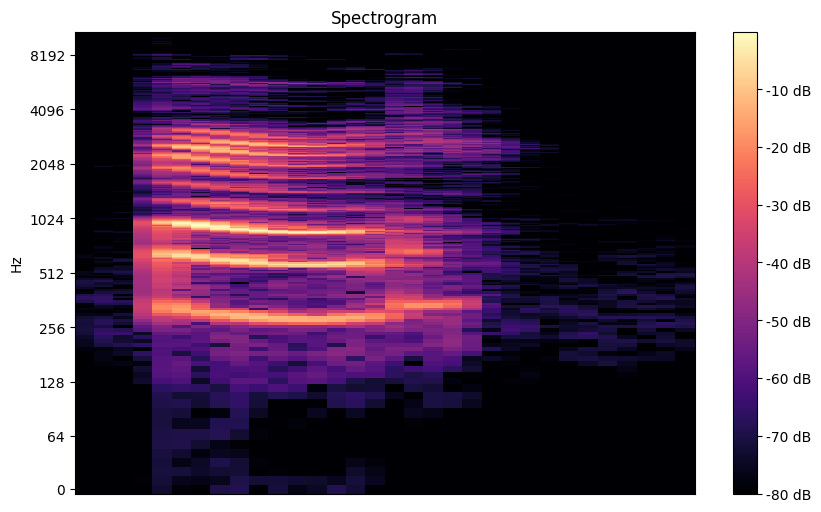

In [14]:
#Visualize and view some of the spectrograms
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_data_bird[0])), ref=np.max)

plt.figure(figsize = (10, 6))
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram');

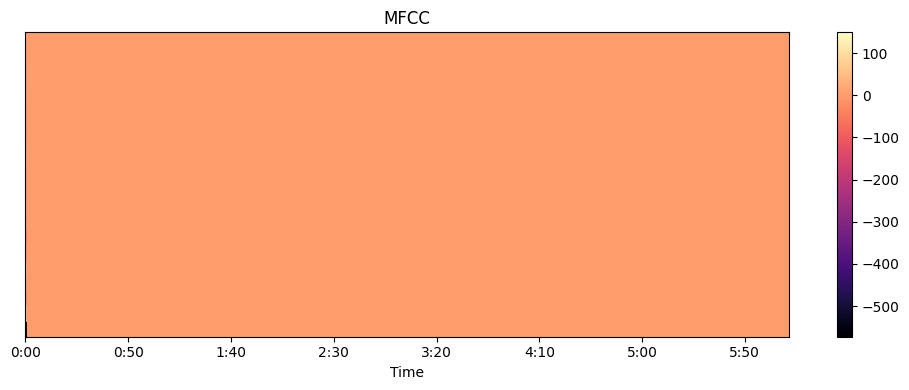

In [19]:
# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs_bird[0], sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [14]:
x_data_cat, spectrograms_cat, mel_spectrograms_cat, mfccs_cat = get_features(cat_files)

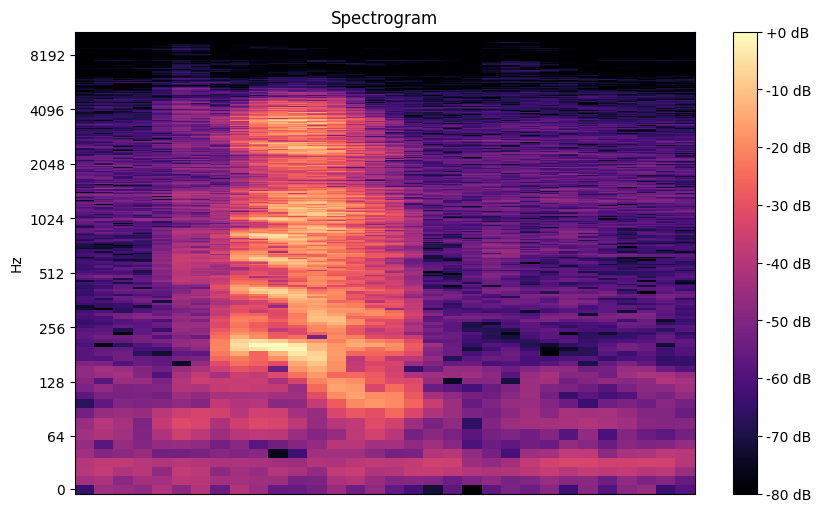

In [14]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_data_cat[0])), ref=np.max)


plt.figure(figsize = (10, 6))
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram');

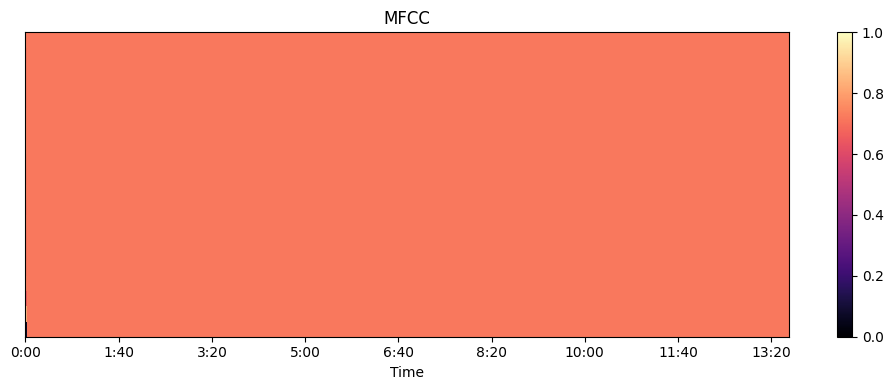

In [34]:
#code snippet of normalization, debugged with the help of chat-GPT
min_val = np.min(mfccs_cat[0])
max_val = np.max(mfccs_cat[0])
mfccs_normalized = (mfccs_cat[0] - min_val) / (max_val - min_val)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs_normalized, sr=10000, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [12]:
x_data_dog, spectrograms_dog, mel_spectrograms_dog, mfccs_dog = get_features(dog_files)

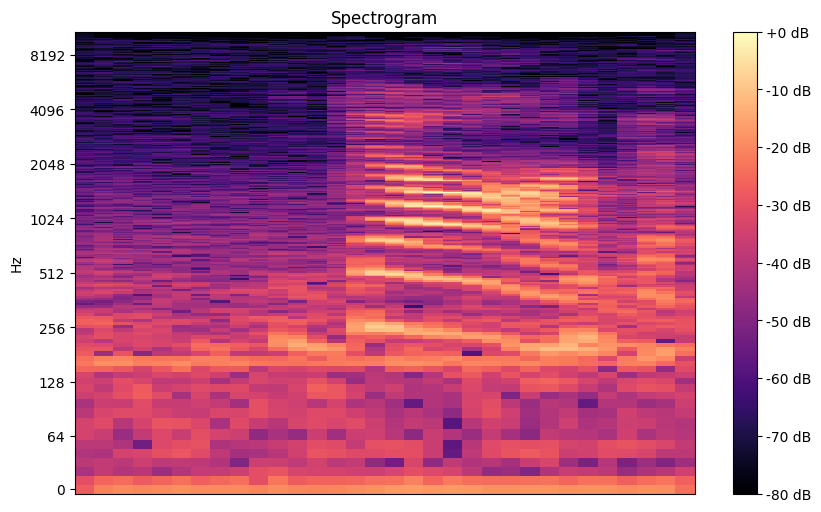

In [12]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_data_dog[0])), ref=np.max)


plt.figure(figsize = (10, 6))
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram');

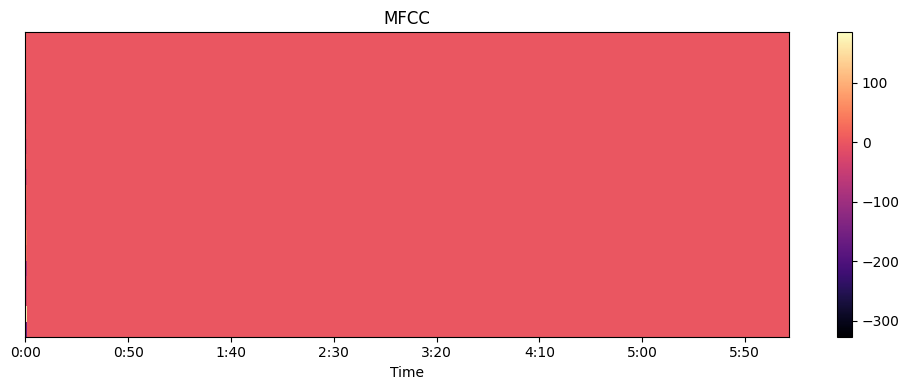

In [13]:
# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs_dog[0], sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

Looking at the graphs, besides the 'I love badminton' phrase, the rest of the MFCC show very little distinction and is often one color, which means that there isn't a lot of variation for the phrase. This makes sense since the phrases are all one word and often very short, wheras the phrase 'I love badminton' is longer and can have more variance which are more distinct. Because of this, it makes more sense to use the Mel-Spectrograms in our future machine learning model as there are more distinctive parts of the spectogram to analyze. 

In [15]:
from sklearn.model_selection import train_test_split

# Path to dataset
data_path = '/Users/kerichen/Downloads/Animals/'

# Extract all possible features and stack them to see if it works well
def extract_features(file_path, n_fft=512):

    audio, sample_rate = librosa.load(file_path)
    
    # Compute various features
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate, n_fft=n_fft).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=n_fft).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(y=audio, sr=sample_rate, n_fft=n_fft).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sample_rate).T, axis=0)
    
    return np.hstack([mfccs, chroma, mel, contrast, tonnetz])


# Initialize lists to hold features and labels
features = []
labels = []

#generated through chat-GPT
# Iterate over each class folder and extract features
for label in ['bird', 'cat', 'dog']:
    class_folder = os.path.join(data_path, label)
    for file_name in os.listdir(class_folder):
        file_path = os.path.join(class_folder, file_name)
        if file_name.endswith('.wav'):
            features.append(extract_features(file_path))
            labels.append(label)

# Convert lists to numpy arrays
X = np.array(features)
y = np.array(labels)


/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=589
  warnings.warn(
/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=295
  warnings.warn(
/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=669
  warnings.warn(
/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=335
  warnings.warn(
/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=677
  warnings.warn(
/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/libro

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [17]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [24]:
# Build the model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classes: bird, cat, dog

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


2024-06-11 17:23:17.873470: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 1s 10ms/step - loss: 28.4595 - accuracy: 0.3566 - val_loss: 10.2559 - val_accuracy: 0.3115
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 18.3109 - accuracy: 0.3258 - val_loss: 1.4929 - val_accuracy: 0.4344
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 10.3186 - accuracy: 0.3463 - val_loss: 1.1803 - val_accuracy: 0.3770
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 7.2281 - accuracy: 0.3156 - val_loss: 1.1371 - val_accuracy: 0.4098
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 5.4218 - accuracy: 0.3566 - val_loss: 1.0685 - val_accuracy: 0.4836
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 4.9418 - accuracy: 0.3299 - val_loss: 1.0397 - val_accuracy: 0.4754
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 3.5246 - accuracy: 0.3730 - val_loss: 1.0552 - val_accuracy: 0.4508
Epoch 8/50
16/16 [========

In [25]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy}')


4/4 - 0s - loss: 1.0909 - accuracy: 0.3279 - 48ms/epoch - 12ms/step
Test accuracy: 0.32786884903907776


In [26]:
# Function to predict the class of a new audio file
def predict_audio_class(file_path):
    features = extract_features(file_path)
    features = features.reshape(1, -1)
    prediction = model.predict(features)
    predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])
    return predicted_class[0]

# Example usage
new_file_path = '/Users/kerichen/Downloads/Animals/dog/31e686d2_nohash_2.wav'
predicted_class = predict_audio_class(new_file_path)
print(f'The predicted class for the audio file is: {predicted_class}')


1/1 [==============================] - 0s 99ms/step
The predicted class for the audio file is: dog


/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(
/Users/kerichen/anaconda3/envs/LIGN168v2/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=345
  warnings.warn(


The accuracy is not that good, perhaps the mel frequency and other features are not good indicators for these types of phrases. We shall try only inspecting the spectrogram and see if that will help us get increased accuracy, by feeding it into a CNN model which is good at image recognition and analysis.

In [7]:
# Define the path to your dataset
data_path = '/Users/kerichen/Downloads/Animals/'

#extract the mel spectrograms from each of the files
def extract_features(file_path, n_fft=512):

    audio, sample_rate = librosa.load(file_path)
    mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=n_fft).T, axis=0)
    return mel


# Initialize lists to hold features and labels
features = []
labels = []

# Iterate over each class folder and extract the spectrogram
for label in ['bird', 'cat', 'dog']:
    class_folder = os.path.join(data_path, label)
    for file_name in os.listdir(class_folder):
        file_path = os.path.join(class_folder, file_name)
        if file_name.endswith('.wav'):
            features.append(extract_features(file_path))
            labels.append(label)

#add custom path files
custom_path = 'Desktop/Wav Files'
for file in os.listdir(custom_path):
    file_path_custom = os.path.join(class_folder, file_name)
    if file.endswith('.wav'):
        features.append(extract_features(file_path_custom))
        labels.append('custom')

# Convert lists to numpy arrays, combining all of the files together
X = np.array(features)
y = np.array(labels)

In [60]:
print (len(X))
print (len(y))

659
659


In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels through python's own function which turns the categorical variables into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Reshape input data for CNN since CNN takes a certain shape
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
K.clear_session()

# We use a sequential model so we can generate each layer manually for the model 
model = Sequential()
# A conv1D model is computationally less intensive and is a type of layer for a CNN model)
model.add(Conv1D(128, 5, padding='same', input_shape=(X_train_cnn.shape[1], 1), activation='relu'))
# we add a max pooling layer and then dropout a set of the values to help with overfitting
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
# we iteratvely add more layers
model.add(Conv1D(64, 5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(32, 5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 classes: bird, cat, dog, other

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/50
17/17 [==============================] - 1s 20ms/step - loss: 1.3974 - accuracy: 0.3340 - val_loss: 1.2892 - val_accuracy: 0.5455
Epoch 2/50
17/17 [==============================] - 0s 12ms/step - loss: 1.1940 - accuracy: 0.4554 - val_loss: 1.1191 - val_accuracy: 0.4773
Epoch 3/50
17/17 [==============================] - 0s 13ms/step - loss: 1.1043 - accuracy: 0.4668 - val_loss: 0.9250 - val_accuracy: 0.6288
Epoch 4/50
17/17 [==============================] - 0s 13ms/step - loss: 1.1164 - accuracy: 0.4668 - val_loss: 0.8920 - val_accuracy: 0.6364
Epoch 5/50
17/17 [==============================] - 0s 16ms/step - loss: 1.0227 - accuracy: 0.5028 - val_loss: 0.8603 - val_accuracy: 0.6591
Epoch 6/50
17/17 [==============================] - 0s 15ms/step - loss: 0.9886 - accuracy: 0.5294 - val_loss: 0.8316 - val_accuracy: 0.6591
Epoch 7/50
17/17 [==============================] - 0s 14ms/step - loss: 0.9616 - accuracy: 0.5787 - val_loss: 0.8044 - val_accuracy: 0.6742
Epoch 8/50
17

In [41]:
# Function to predict the class of a new audio file
def predict_audio_class(file_path):
    features = extract_features(file_path)
    features = features.reshape(1, -1)
    prediction = model.predict(features)
    predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])
    return predicted_class[0]

# Example usage
new_file_path = 'Desktop/Wav Files/New Recording 55.wav'
predicted_class = predict_audio_class(new_file_path)
print(f'The predicted class for the audio file is: {predicted_class}')


1/1 [==============================] - 0s 20ms/step
The predicted class for the audio file is: dog


In [30]:
K.clear_session()

# Build the CNN model
# we slightly change the base model by removing some of the layers
model = Sequential()
model.add(Conv1D(128, 5, padding='same', input_shape=(X_train_cnn.shape[1], 1), activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, 5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 classes: bird, cat, dog, other

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/50
17/17 [==============================] - 1s 19ms/step - loss: 1.3303 - accuracy: 0.3264 - val_loss: 1.2015 - val_accuracy: 0.7045
Epoch 2/50
17/17 [==============================] - 0s 13ms/step - loss: 1.1583 - accuracy: 0.4516 - val_loss: 0.9418 - val_accuracy: 0.6212
Epoch 3/50
17/17 [==============================] - 0s 13ms/step - loss: 1.1285 - accuracy: 0.5009 - val_loss: 0.8380 - val_accuracy: 0.6212
Epoch 4/50
17/17 [==============================] - 0s 15ms/step - loss: 1.0094 - accuracy: 0.5313 - val_loss: 0.8224 - val_accuracy: 0.6439
Epoch 5/50
17/17 [==============================] - 1s 34ms/step - loss: 0.9406 - accuracy: 0.5484 - val_loss: 0.7987 - val_accuracy: 0.6742
Epoch 6/50
17/17 [==============================] - 0s 17ms/step - loss: 0.9431 - accuracy: 0.5465 - val_loss: 0.7780 - val_accuracy: 0.6894
Epoch 7/50
17/17 [==============================] - 0s 15ms/step - loss: 0.8949 - accuracy: 0.6034 - val_loss: 0.7346 - val_accuracy: 0.7424
Epoch 8/50
17

In [58]:
# Function to predict the class of a new audio file
def predict_audio_class(file_path, threshold=0.60):
    features = extract_features(file_path)
    features = np.expand_dims(features, -1)  # Add channel dimension
    features = np.expand_dims(features, 0)  # Add batch dimension
    prediction = model.predict(features)
    confidence = np.max(prediction)
    
    if confidence >= threshold:
        predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])[0]
    else:
        predicted_class = "None"
    
    return predicted_class, confidence

# Example usage
new_file_path = 'Desktop/Wav Files/New Recording 30.wav'
predicted_class = predict_audio_class(new_file_path)
print(f'The predicted class for the audio file is: {predicted_class}')


1/1 [==============================] - 0s 100ms/step
The predicted class for the audio file is: ('None', 0.5826239)


## Analysis of Results
The model works well for the 3 phrases, however when manually testing for custom files it incorrectly predicts the predicted class. A possible explanation may be the difference in timing as the 3 phrases are relatively short and last only a couple seconds, however the custom phrase is slightly longer and this can lead to some inconsistencies when anallyzing the full spectrogram. 
By looking at the image of the spectrogram and then building a CNN model on top of that, it utilize the built-in models from librosa and keras to review and look at the image, and then predict what the word may be by looking at the word. Additionally, because I did not train for other phrases/words, other words that get sent to the model will automatically get matched to one of the 4 classes. We can fix this by adding a threshold value that evaluates to None if the confidence level of the prediction is lower than a certain prediction. For some reason, the model does not output the predicted class value of 'custom.' A reason for this could be the amount of sample audio files that custom has compared to the rest of the audio files, custom only has around ~50 files while the rest have more than 100, which can allow the model to learn and generalize more. 